Import Libraries

In [1]:
import torch
import torch.nn as nn
from torch.hub import load_state_dict_from_url
from torch.utils.model_zoo import load_url as load_state_dict_from_url
from typing import Type, Any, Callable, Union, List, Dict, Optional, cast
from torch import Tensor
from collections import OrderedDict 

Build New Model

In [2]:
import torchvision.models as models
rnext = models.resnext101_32x8d(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth" to /root/.cache/torch/hub/checkpoints/resnext101_32x8d-8ba56ff5.pth


  0%|          | 0.00/340M [00:00<?, ?B/s]

In [3]:
children_counter = 0
for n,c in rnext.named_children():
    print("Children Counter: ",children_counter," Layer Name: ",n,)
    children_counter+=1

Children Counter:  0  Layer Name:  conv1
Children Counter:  1  Layer Name:  bn1
Children Counter:  2  Layer Name:  relu
Children Counter:  3  Layer Name:  maxpool
Children Counter:  4  Layer Name:  layer1
Children Counter:  5  Layer Name:  layer2
Children Counter:  6  Layer Name:  layer3
Children Counter:  7  Layer Name:  layer4
Children Counter:  8  Layer Name:  avgpool
Children Counter:  9  Layer Name:  fc


In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
from PIL import Image
import cv2
import torchvision.transforms as transforms
import collections
import random
from random import seed, choice, sample
import os
import json
from google.colab.patches import cv2_imshow
import sys
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False
from os.path import exists, join, basename, splitext
import csv
import glob

In [6]:
%matplotlib inline
import os
import sys
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import skimage.transform
from PIL import Image
from collections import Counter
from tqdm.notebook import tqdm

import torch
torch.cuda.empty_cache()
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence
from nltk.translate.bleu_score import corpus_bleu

import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm

from gensim.models.fasttext import FastText
 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
os.chdir('/content/drive/My Drive/Final Year Project/')

In [9]:
print(os.path.abspath('.'))

/content/drive/.shortcut-targets-by-id/1sz5w7NJWd5pUCRXsoinjyyZ-EUMh1tbM/Final Year Project


In [10]:
json_path = '/content/drive/My Drive/Final Year Project/'
annotation_folder = json_path + '/dataset/annotations/'

max_len = 100               # length of padded captions
min_word_freq = 5           # words occuring less than this threshold will be labelled as <unk>
captions_per_image = 5      # number of captions per image
word_freq = Counter()       # Counter object to find the freq of each word


def to_lower(caption_words):
  for i in range(len(caption_words)):
    word = caption_words[i]
    word = word.lower()
    caption_words[i] = word
  return caption_words

count = 0
train_captions_json_path = annotation_folder + 'train.json'
with open(train_captions_json_path, 'r') as f:
    data_train = json.load(f)
image_folder_train = json_path + 'dataset/train/'   # folder with download images for train set
for val in data_train['annotations']:
  #print(val)
  path = image_folder_train + 'VizWiz_train_' + '%08d.jpg' % (val['image_id'])
  count = count+1
  caption = val['caption']
  caption_words = caption.split()
  caption_words = to_lower(caption_words)
  word_freq.update(caption_words)
  #print(word_freq.keys())
  #print(caption_words)
  #print(count)
#print("Count of train images' captions encoded: ",count)

count=0
val_captions_json_path = annotation_folder + 'val.json'
with open(val_captions_json_path, 'r') as f:
    data_val = json.load(f)
image_folder_val = json_path + 'dataset/val/'   # folder with download images for val set
for val in data_val['annotations']:
  #print(val)
  path = image_folder_val + 'VizWiz_val_' + '%08d.jpg' % (val['image_id']-23431)
  #print((val['image_id']-23431))
  count = count+1
  caption = val['caption']
  caption_words = caption.split()
  caption_words = to_lower(caption_words)
  word_freq.update(caption_words)
  #print(word_freq.keys())
  #print(caption_words)
  #print(count)
#print("Count of val images' captions encoded: ",count)

# create word map (dict mapping words to ids with 0 reserved for padding)
words = [word for word in word_freq.keys() if word_freq[word] > min_word_freq]
word2id = {word: id for id, word in enumerate(words, 1)}
word2id['<unk>'] = len(word2id) + 1
word2id['<start>'] = len(word2id) + 1
word2id['<end>'] = len(word2id) + 1
word2id['<pad>'] = 0

# create reverse word map (dict mapping ids to words)
id2word = {value: word for word, value in word2id.items()}
print(id2word)

{1: 'its', 2: 'is', 3: 'a', 4: 'basil', 5: 'leaves', 6: 'container', 7: 'contains', 8: 'the', 9: 'net', 10: 'weight', 11: 'too.', 12: 'green', 13: 'and', 14: 'white', 15: 'plastic', 16: 'condiment', 17: 'bottle', 18: 'containing', 19: 'leaves.', 20: 'quality', 21: 'issues', 22: 'are', 23: 'too', 24: 'severe', 25: 'to', 26: 'recognize', 27: 'visual', 28: 'content.', 29: 'of', 30: 'spices', 31: 'in', 32: 'laying', 33: 'on', 34: 'surface.', 35: 'some', 36: 'counter', 37: 'can', 38: 'coca', 39: 'cola', 40: 'shown', 41: 'for', 42: 'when', 43: 'one', 44: 'use', 45: 'cold', 46: 'drink.', 47: 'black', 48: 'zero', 49: 'calorie', 50: 'soda', 51: 'near', 52: 'coffee', 53: 'maker.', 54: 'kitchen', 55: 'various', 56: 'items', 57: 'top', 58: 'including', 59: 'metal', 60: 'containers,', 61: 'tin', 62: 'placed', 63: 'surface', 64: 'with', 65: 'kettle', 66: 'soda.', 67: 'crushed', 68: 'tomatoes', 69: 'brown', 70: 'surface,', 71: 'read', 72: 'brand.', 73: 'sitting', 74: 'beige', 75: 'colored', 76: 'coun

In [11]:
# split the images and captions into train and val sets
train_image_paths = []
train_image_captions = []
train_caption_lens = []

split = "train"
count = 0
captions = []
for val in data_train['annotations']:
  #print(val)
  path = image_folder_train + 'VizWiz_train_' + '%08d.jpg' % (val['image_id'])
  count = count+1
  if(count>500):
    break
  caption = val['caption']
  #print(caption)
  caption_words = caption.split()
  for i in range(len(caption_words)):
    word = caption_words[i]
    word = word.lower()
    caption_words[i] = word
  if(len(caption_words) <= max_len):
    captions.append(caption_words)
    
  if(len(captions) == 0):
    continue
    
  # sample the captions randomly such that every image has same no of captions
  if len(captions) < captions_per_image:
      captions += [random.choice(captions) for _ in range(captions_per_image - len(captions))]
  else:
      captions = random.sample(captions, k=captions_per_image)
    
  # sanity check
  assert len(captions) == captions_per_image

  # encode and pad captions
  enc_captions = []
  caption_lens = []
  for idx, caption in enumerate(captions):
      enc_caption = [word2id['<start>']] + [word2id.get(word, word2id['<unk>']) for word in caption] + [
                      word2id['<end>']] + [word2id['<pad>']] * (max_len - len(caption))
        
      # find caption length (including start and end token)
      caption_len = len(caption) + 2

      enc_captions.append(enc_caption)
      caption_lens.append(caption_len)

  # get the absolute path of image
  path = image_folder_train + 'VizWiz_train_' + '%08d.jpg' % (val['image_id'])
  #print(path)

  # add the image path, encoded caption to the list
  if split=="train":
      train_image_paths.append(path)
      train_image_captions.append(enc_captions)
      train_caption_lens.append(caption_lens)
      #print(path," ", enc_captions, " ", caption_lens)
    
# sanity check
assert len(train_image_paths) == len(train_image_captions)

In [12]:
val_image_paths = []
val_image_captions = []
val_caption_lens = []

split = "val"
count = 0
captions = []
for val in data_val['annotations']:
  #print(val)
  path = image_folder_val + 'VizWiz_val_' + '%08d.jpg' % (val['image_id']-23431)
  count = count+1
  if(count>75):
    break
  caption = val['caption']
  #print(caption)
  caption_words = caption.split()
  for i in range(len(caption_words)):
    word = caption_words[i]
    word = word.lower()
    caption_words[i] = word
  if(len(caption_words) <= max_len):
    captions.append(caption_words)
    
  if(len(captions) == 0):
    continue
    
  # sample the captions randomly such that every image has same no of captions
  if len(captions) < captions_per_image:
      captions += [random.choice(captions) for _ in range(captions_per_image - len(captions))]
  else:
      captions = random.sample(captions, k=captions_per_image)
    
  # sanity check
  assert len(captions) == captions_per_image

  # encode and pad captions
  enc_captions = []
  caption_lens = []
  for idx, caption in enumerate(captions):
      enc_caption = [word2id['<start>']] + [word2id.get(word, word2id['<unk>']) for word in caption] + [
                      word2id['<end>']] + [word2id['<pad>']] * (max_len - len(caption))
        
      # find caption length (including start and end token)
      caption_len = len(caption) + 2

      enc_captions.append(enc_caption)
      caption_lens.append(caption_len)

  # get the absolute path of image
  path = image_folder_val + 'VizWiz_val_' + '%08d.jpg' % (val['image_id']-23431)
  #print(path)

  # add the image path, encoded caption to the list
  if split=="val":
      val_image_paths.append(path)
      val_image_captions.append(enc_captions)
      val_caption_lens.append(caption_lens)
      #print(path," ", enc_captions, " ", caption_lens)
    
# sanity check
assert len(val_image_paths) == len(val_image_captions)

In [13]:
print(len(train_image_paths), len(train_image_captions))
print(len(val_image_paths), len(val_image_captions))

500 500
75 75


In [14]:
# sets device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [15]:
filename = '/content/drive/My Drive/Final Year Project/input_images_train.txt'
read_file = open(filename,"r") 

train_numpy_paths = []
train_numpy_names = []
#print("Output of Read function is ")
data_read = read_file.read()
data_into_list = data_read.split("\n")
#print(data_into_list)
for i in range(len(data_into_list)):
    if(len(data_into_list[i])>1):
        train_numpy_paths.append(data_into_list[i])
        path = data_into_list[i]
        name_list = path.split("/")
        name = name_list[len(name_list)-1]
        #print(path)
        train_numpy_names.append(name)
print("No. of images: ",len(train_numpy_paths), len(train_numpy_names))

No. of images:  23431 23431


In [16]:
filename = '/content/drive/My Drive/Final Year Project/input_images_val.txt'
read_file = open(filename,"r") 

val_numpy_paths = []
val_numpy_names = []
#print("Output of Read function is ")
data_read = read_file.read()
data_into_list = data_read.split("\n")
#print(data_into_list)
for i in range(len(data_into_list)):
    if(len(data_into_list[i])>1):
        val_numpy_paths.append(data_into_list[i])
        path = data_into_list[i]
        name_list = path.split("/")
        name = name_list[len(name_list)-1]
        #print(path)
        val_numpy_names.append(name)
print("No. of images: ",len(val_numpy_paths), len(val_numpy_names))

No. of images:  7750 7750


In [17]:
features_dict = dict()
cnn_path = '/content/drive/My Drive/Final Year Project/cnn_features/'

for i in range(100):
  key = train_numpy_names[i]
  name = train_numpy_names[i]
  name = name[:len(name)-4]
  print(key)
  np_cnn_path = cnn_path + name + '.npy'
  f_cnn = np.load(np_cnn_path)
  f = [f_cnn]
  features_dict[key] = f

print(len(features_dict))
print(f[0].shape)

VizWiz_train_00000000.jpg
VizWiz_train_00000001.jpg
VizWiz_train_00000002.jpg
VizWiz_train_00000003.jpg
VizWiz_train_00000004.jpg
VizWiz_train_00000005.jpg
VizWiz_train_00000006.jpg
VizWiz_train_00000007.jpg
VizWiz_train_00000008.jpg
VizWiz_train_00000009.jpg
VizWiz_train_00000010.jpg
VizWiz_train_00000011.jpg
VizWiz_train_00000012.jpg
VizWiz_train_00000013.jpg
VizWiz_train_00000014.jpg
VizWiz_train_00000015.jpg
VizWiz_train_00000016.jpg
VizWiz_train_00000017.jpg
VizWiz_train_00000018.jpg
VizWiz_train_00000019.jpg
VizWiz_train_00000020.jpg
VizWiz_train_00000021.jpg
VizWiz_train_00000022.jpg
VizWiz_train_00000023.jpg
VizWiz_train_00000024.jpg
VizWiz_train_00000025.jpg
VizWiz_train_00000026.jpg
VizWiz_train_00000027.jpg
VizWiz_train_00000028.jpg
VizWiz_train_00000029.jpg
VizWiz_train_00000030.jpg
VizWiz_train_00000031.jpg
VizWiz_train_00000032.jpg
VizWiz_train_00000033.jpg
VizWiz_train_00000034.jpg
VizWiz_train_00000035.jpg
VizWiz_train_00000036.jpg
VizWiz_train_00000037.jpg
VizWiz_train

In [18]:
cnn_val_path = '/content/drive/My Drive/Final Year Project/cnn_val_features/'

for i in range(15):
  key = val_numpy_names[i]
  name = val_numpy_names[i]
  name = name[:len(name)-4]
  print(key)
  np_cnn_path = cnn_val_path + name + '.npy'
  f_cnn = np.load(np_cnn_path)
  f = [f_cnn]
  features_dict[key] = f

print(len(features_dict))
print(f[0].shape)

VizWiz_val_00000000.jpg
VizWiz_val_00000001.jpg
VizWiz_val_00000002.jpg
VizWiz_val_00000003.jpg
VizWiz_val_00000004.jpg
VizWiz_val_00000005.jpg
VizWiz_val_00000006.jpg
VizWiz_val_00000007.jpg
VizWiz_val_00000008.jpg
VizWiz_val_00000009.jpg
VizWiz_val_00000010.jpg
VizWiz_val_00000011.jpg
VizWiz_val_00000012.jpg
VizWiz_val_00000013.jpg
VizWiz_val_00000014.jpg
115
(1, 2048, 14, 14)


In [19]:
class CaptionDataset(Dataset):
    def __init__(self, image_paths, captions, caption_lens, split, captions_per_image=5, transform=None):
        self.split = split
        assert self.split in {'TRAIN', 'VAL', 'TEST'}

        self.image_paths = image_paths
        self.captions = captions
        self.caption_lens = caption_lens
        self.captions_per_image = captions_per_image

        # pytorch transformation pipeline for image (normalizing, etc)
        self.transform = transform
    
    def __len__(self):
        return len(self.image_paths) * self.captions_per_image
    
    def __getitem__(self, idx):
        # remember the Nth caption belongs to (N // captions_per_image)th image
        img_path = (self.image_paths[idx//self.captions_per_image])
        img = Image.open(self.image_paths[idx // self.captions_per_image]).convert('RGB')
        img = np.array(img)
        img = cv2.resize(img, (256, 256))

        # sanity check
        assert img.shape == (256, 256, 3)
        assert np.max(img) <= 255.

        if self.transform is not None:
            img = self.transform(img)
        
        img = np.array(img)
        img = np.transpose(img, (2, 0, 1))
        img = torch.FloatTensor(img / 255.)

        caption = torch.LongTensor(self.captions[idx // self.captions_per_image][idx % self.captions_per_image])
        caption_len = torch.LongTensor([self.caption_lens[idx // self.captions_per_image][idx % self.captions_per_image]])

        if self.split == 'TRAIN':
            #print("train-20")
            return img, caption, caption_len, img_path
        else:
            # return all captions per image for validation or testing to find the BLEU-4 scores
            all_captions = torch.LongTensor(self.captions[idx // self.captions_per_image])
            return img, caption, caption_len, img_path, all_captions

In [20]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])
train_dataset = CaptionDataset(train_image_paths, train_image_captions, train_caption_lens, 'TRAIN')
val_dataset = CaptionDataset(val_image_paths, val_image_captions, val_caption_lens, 'VAL')

In [22]:
print(train_dataset[0])

(tensor([[[0.8863, 0.7843, 0.5451,  ..., 0.8980, 0.8863, 0.9569],
         [0.8667, 0.6902, 0.4353,  ..., 0.9490, 0.9373, 0.9098],
         [0.8471, 0.7216, 0.4863,  ..., 0.9216, 0.9137, 0.9020],
         ...,
         [0.3529, 0.3647, 0.3529,  ..., 0.4667, 0.4706, 0.4667],
         [0.3608, 0.3647, 0.3412,  ..., 0.4353, 0.4863, 0.4510],
         [0.3216, 0.3529, 0.3647,  ..., 0.4588, 0.4745, 0.4588]],

        [[0.7216, 0.6510, 0.4235,  ..., 0.6392, 0.6196, 0.6863],
         [0.7098, 0.5529, 0.3216,  ..., 0.6863, 0.6745, 0.6431],
         [0.6980, 0.5843, 0.3647,  ..., 0.6706, 0.6588, 0.6392],
         ...,
         [0.1922, 0.2118, 0.2078,  ..., 0.3843, 0.3843, 0.3843],
         [0.2039, 0.2118, 0.1961,  ..., 0.3490, 0.4039, 0.3765],
         [0.1686, 0.2078, 0.2157,  ..., 0.3804, 0.4000, 0.3922]],

        [[0.5529, 0.5098, 0.2980,  ..., 0.3059, 0.3020, 0.3922],
         [0.6078, 0.4471, 0.2078,  ..., 0.3765, 0.3725, 0.3490],
         [0.5765, 0.4627, 0.2471,  ..., 0.3647, 0.3647, 0

In [24]:
name = '/content/drive/My Drive/Final Year Project/dataset/train/VizWiz_train_00000403.jpg'
img = Image.open(name)

print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=968x1296 at 0x7FAB3F152210>


In [25]:
def decode_caption(enc_caption):
    dec_caption = [
        id2word[id]
        for id in caption.numpy()
        if id2word[id] not in ["<start>", "<end>", "<unk>", "<pad>"]
    ]
    return " ".join(dec_caption)

its is a basil leaves container its contains the net weight too.



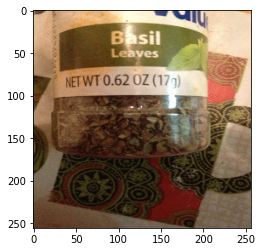

In [26]:
img, caption, caption_len, _ = train_dataset[10]
#print(img, caption, caption_len)
print(decode_caption(caption))
print()
plt.imshow(img.permute(1, 2, 0));

In [28]:
batch_size = 32
workers = 2

# dataloader for train and val set
train_loader = DataLoader(train_dataset, batch_size=batch_size, 
                          shuffle=True, num_workers=workers, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, 
                          shuffle=True, num_workers=workers, pin_memory=True)

# quick check to see if data is properly loaded or not
images, captions, caption_lens, img_paths = next(iter(train_loader))
print(images.shape)
print(captions.shape)
print(caption_lens.shape)
print(len(img_paths))

torch.Size([32, 3, 256, 256])
torch.Size([32, 102])
torch.Size([32, 1])
32


In [31]:
class ImageEncoder(nn.Module):
    def __init__(self, enc_image_size=14):
        super(ImageEncoder, self).__init__()
        self.enc_image_size = enc_image_size

        # pretrained ImageNet ResNeXt-101
        resnext = models.resnext101_32x8d(pretrained=True)

        # remove linear and pool layers
        modules = list(resnext.children())[:-2]
        #print(modules)
        self.resnext = nn.Sequential(*modules)

        # resize image to fixed size using adaptive pool to allow input images of variable size
        self.adaptive_pool = nn.AdaptiveAvgPool2d((enc_image_size, enc_image_size))

        self.fine_tune()

    def fine_tune(self, fine_tune=True):
        """
        Allow or prevent computation of the gradients for convolutional blocks 2 through 4 of the image encoder.
        :param fine_tune: boolean
        """
        for param in self.resnext.parameters():
            param.requires_grad = False
        # if fine-tuning, fine-tune convolutional blocks 2 through 4
        for child in list(self.resnext.children())[5:]:
            for param in child.parameters():
                param.requires_grad = fine_tune
    
    def forward(self, images, img_paths, split):
        """
        Forward propagation.
        :param images: images, a tensor of dim (batch_size, 3, image_size, image_size)
        :return enc_images: encoded repr of images, a tensor of dim (batch_size, enc_image_size, enc_image_size, 2048)
        """
        
        features_out = []

        for i in range(len(img_paths)):
          name_list = img_paths[i].split("/")
          name = name_list[len(name_list)-1]
          out = features_dict[name]
          features_out.append(out[0])

        #print(features_out[0].shape, len(features_out))

        for i in range(len(features_out)):
          result = np.transpose(features_out[i], [0,2,3,1])
          features_out[i] = result

        #print(features_result[0].shape)

        features_encoded = np.vstack((features_out))
        #print(features_encoded.shape)
        
        out_final = features_encoded #(batch_size,14,14,2348)
        out_final = torch.from_numpy(out_final).to("cuda")
        out_final = out_final.float()

        return out_final

In [32]:
split = 'train'
fine_tune_encoder = False  # fine-tune encoder?
encoder_lr = 1e-4  # learning rate for encoder if fine-tuning
encoder = ImageEncoder()
encoder.fine_tune(fine_tune_encoder)
encoder_optimizer = optim.Adam(params=filter(lambda p: p.requires_grad, encoder.parameters()), lr=encoder_lr) if fine_tune_encoder else None

imgs = encoder(images, img_paths, split)
print(imgs.shape, imgs.dtype)

torch.Size([32, 14, 14, 2048]) torch.float32


In [33]:
class Attention(nn.Module):
    def __init__(self, encoder_dim, decoder_dim, attention_dim):
        """
        :param encoder_dim: feature size of encoded images
        :param decoder_dim: size of decoder's RNN
        :param attention_dim: size of the attention network
        """
        super(Attention, self).__init__()
        self.encoder_attn = nn.Linear(encoder_dim, attention_dim)   # linear layer to transform encoder's output
        self.decoder_attn = nn.Linear(decoder_dim, attention_dim)   # linear layer to transform decoder's output
        self.full_attn = nn.Linear(attention_dim, 1)
    
    def forward(self, encoder_out, decoder_hidden):
        """
        Forward propagation (uses Multiplicative attention).
        :param encoder_out: encoded images, a tensor of dim (batch_size, num_pixels, encoder_dim)
        :param decoder_hidden: previous decoder output, a tensor of dim (batch_size, decoder_dim)
        """
        attn1 = self.encoder_attn(encoder_out)          # (batch_size, num_pixels, attention_dim)
        attn2 = self.decoder_attn(decoder_hidden)       # (batch_size, attention_dim)
        attn = self.full_attn(F.relu(attn1 + attn2.unsqueeze(1)))    # (batch_size, num_pixels, 1)

        # apply softmax to calculate weights for weighted encoding based on attention
        alpha = F.softmax(attn, dim=1)                  # (batch_size, num_pixels, 1)
        attn_weighted_encoding = (encoder_out * alpha).sum(dim=1)  # (batch_size, encoder_dim)
        alpha = alpha.squeeze(2)  # (batch_size, num_pixels)
        return attn_weighted_encoding, alpha

In [34]:
class DecoderWithAttention(nn.Module):
    def __init__(self, attention_dim, embed_dim, decoder_dim, vocab_size, encoder_dim=2048, dropout=0.5):
        """
        :param attention_dim: size of attention network
        :param embed_dim: embedding_size
        :param decoder_dim: feature size of decoder's RNN
        :param vocab_size: size of vocabulary
        :param encoder_dim: feature size of encoded images
        :param dropout: dropout
        """
        super(DecoderWithAttention, self).__init__()
        self.encoder_dim = encoder_dim
        self.attention_dim = attention_dim
        self.embed_dim = embed_dim
        self.decoder_dim = decoder_dim
        self.vocab_size = vocab_size
        self.dropout = dropout

        self.attention = Attention(encoder_dim, decoder_dim, attention_dim)     # attention network
        self.embedding = nn.Embedding(vocab_size, embed_dim)                    # embedding layer
        self.dropout = nn.Dropout(p=dropout)

        self.decode_step = nn.LSTMCell(embed_dim + encoder_dim, decoder_dim, bias=True) # decoding LSTMCell
        self.init_h = nn.Linear(encoder_dim, decoder_dim)   # linear layer to find initial hidden state of LSTMCell
        self.init_c = nn.Linear(encoder_dim, decoder_dim)    # linear layer to find initial cell state of LSTMCell
        self.f_beta = nn.Linear(decoder_dim, encoder_dim)   # linear layer to create a sigmoid-activated gate

        self.fc = nn.Linear(decoder_dim, vocab_size)        # linear layer to find scores over vocabulary
        
        self.init_weights()     # initialize some layers with the uniform distribution
    
    def init_weights(self):
        """
        Initialize some layers with the uniform distribution for easier convergence.
        """
        self.embedding.weight.data.uniform_(-0.1, 0.1)
        self.fc.bias.data.fill_(0)
        self.fc.weight.data.uniform_(-0.1, 0.1)
    
    def init_hidden_state(self, encoder_out):
        """
        Creates the initial hidden and cell states for the decoder's LSTM based on the encoded images.
        :param encoder_out: encoded_images, a tensor of dimension (batch_size, num_pixels, encoder_dim)
        :return hidden_state, cell_state
        """
        mean_encoder_out = encoder_out.mean(dim=1)  # (batch_size, encoder_dim)
        h = self.init_h(mean_encoder_out)   # (batch_size, decoder_dim)
        c = self.init_c(mean_encoder_out)   # (batch_size, decoder_dim)
        return h, c
    
    def forward(self, encoder_out, encoded_captions, caption_lens):
        """
        Forward propagation.
        :param encoder_out: encoded images, a tensor of dimension (batch_size, enc_image_size, enc_image_size, encoder_dim)
        :param encoded_captions: encoded captions, a tensor of dimension (batch_size, max_caption_length)
        :param caption_lengths: caption lengths, a tensor of dimension (batch_size, 1)
        :return: scores for vocabulary, sorted encoded captions, decode lengths, weights, sort indices
        """
        batch_size = encoder_out.size(0)
        #print("batch size in decoder: ",batch_size)
        # flatten image
        encoder_out = encoder_out.view(batch_size, -1, encoder_dim)     # (batch_size, num_pixels, encoder_dim)
        #print("encoder_out.size(): ",encoder_out.size())
        num_pixels = encoder_out.size(1)
        
        # sort the input data by the decreasing caption length
        caption_lens, sort_idx = caption_lens.squeeze(1).sort(dim=0, descending=True)
        encoder_out = encoder_out[sort_idx]
        encoded_captions = encoded_captions[sort_idx]

        # embedding
        embeddings = self.embedding(encoded_captions)   # (batch_size, max_caption_length, embed_dim)

        # initialize lstm state
        h, c = self.init_hidden_state(encoder_out)      # (batch_size, decoder_dim)

        # We won't decode at the <end> position, since we've finished generating as soon as we generate <end>
        # So, decoding lengths are caption lengths - 1
        decode_lens = (caption_lens - 1).tolist()

        # create tensors to hold word prediction scores and alphas
        predictions = torch.zeros(batch_size, max(decode_lens), vocab_size).to(device)
        alphas = torch.zeros(batch_size, max(decode_lens), num_pixels).to(device)

        # At each time-step, decode by attention-weighing the encoder's output based on the 
        # decoder's previous hidden state output then generate a new word in the decoder with 
        # the previous word and the attention weighted encoding
        for t in range(max(decode_lens)):
            # get the batch size for each time step t
            batch_size_t = sum([l > t for l in decode_lens])

            # get the attention weighted encodings (batch_size_t, encoder_dim)
            attention_weighted_encoding, alpha = self.attention(encoder_out[:batch_size_t], h[:batch_size_t])

            gate = F.sigmoid(self.f_beta(h[:batch_size_t]))     # sigmoid gating scalar, (batch_size_t, encoder_dim)
            attention_weighted_encoding = gate * attention_weighted_encoding

            # get the decoder hidden state and cell state based on the embeddings of timestep t word 
            # and the attention weighted encoding
            h, c = self.decode_step(
                torch.cat([embeddings[:batch_size_t, t, :], attention_weighted_encoding], dim=1),
                (h[:batch_size_t], c[:batch_size_t])
            )   # (batch_size_t, decoder_dim)

            # get the next word prediction
            preds = self.fc(self.dropout(h))    # (batch_size_t, vocab_size)

            # save the prediction and alpha for every time step
            predictions[:batch_size_t, t, :] = preds
            alphas[:batch_size_t, t, :] = alpha
    
        return predictions, encoded_captions, decode_lens, alphas, sort_idx


In [35]:
def accuracy(scores, targets, k):
    """
    Computes top-k accuracy, from predicted and true labels.
    :param scores: scores from the model
    :param targets: true labels
    :param k: k in top-k accuracy
    :return: top-k accuracy
    """

    batch_size = targets.size(0)
    _, ind = scores.topk(k, 1, True, True)
    correct = ind.eq(targets.view(-1, 1).expand_as(ind))
    correct_total = correct.view(-1).float().sum()  # 0D tensor
    return correct_total.item() * (100.0 / batch_size)

In [36]:
def clip_gradient(optimizer, grad_clip):
    """
    Clips gradients computed during backpropagation to avoid explosion of gradients.
    :param optimizer: optimizer with the gradients to be clipped
    :param grad_clip: clip value
    """
    for group in optimizer.param_groups:
        for param in group['params']:
            if param.grad is not None:
                param.grad.data.clamp_(-grad_clip, grad_clip)

In [37]:
def save_checkpoint(epoch, epochs_since_improvement, encoder, decoder, encoder_optimizer, decoder_optimizer,
                    bleu4, is_best):
    """
    Saves model checkpoint.
    :param epoch: epoch number
    :param epochs_since_improvement: number of epochs since last improvement in BLEU-4 score
    :param encoder: encoder model
    :param decoder: decoder model
    :param encoder_optimizer: optimizer to update encoder's weights, if fine-tuning
    :param decoder_optimizer: optimizer to update decoder's weights
    :param bleu4: validation BLEU-4 score for this epoch
    :param is_best: is this checkpoint the best so far?
    """
    state = {
        'epoch': epoch,
        'epochs_since_improvement': epochs_since_improvement,
        'bleu-4': bleu4,
        'encoder': encoder,
        'decoder': decoder,
        'encoder_optimizer': encoder_optimizer,
        'decoder_optimizer': decoder_optimizer
    }
    filename = 'image_captioning_saved_checkpoint_' + str(epoch) + '.pth'
    torch.save(state, filename)
    # store the copy of best checkpoint 
    if is_best:
        print('Saving the best model')
        torch.save(state, 'image_captioning_saved_best.pth')

In [38]:
def train_epoch(train_loader, encoder, decoder, criterion, encoder_optimizer, decoder_optimizer):
    """
    Performs one epoch's training.
    :param train_loader: DataLoader for training data
    :param encoder: encoder model
    :param decoder: decoder model
    :param criterion: loss layer
    :param encoder_optimizer: optimizer to update encoder's weights (if fine-tuning)
    :param decoder_optimizer: optimizer to update decoder's weights
    :param epoch: epoch number
    """
    split = "train"
    losses = []
    top5accs = []

    # train mode (dropout and batchnorm is used)
    decoder.train()
    encoder.train()

    for i, (imgs, caps, cap_lens, img_paths) in enumerate(tqdm(train_loader, total=len(train_loader))):
        # move tensor to GPU if available
        imgs = imgs.to(device)
        caps = caps.to(device)
        cap_lens = cap_lens.to(device)

        # forward prop
        imgs = encoder(imgs, img_paths, split)
        scores, caps_sorted, decode_lengths, alphas, sort_ind = decoder(imgs, caps, cap_lens)

        # since we decoded starting with <start>, the targets are all words after <start>, up to <end>
        targets = caps_sorted[:, 1:]

        # remove timesteps that we didn't decode at, or are pads
        scores = pack_padded_sequence(scores, decode_lengths, batch_first=True).data
        targets = pack_padded_sequence(targets, decode_lengths, batch_first=True).data

        # calculate the loss
        loss = criterion(scores, targets) + alpha_c * ((1. - alphas.sum(dim=1)) ** 2).mean()

        # backprop
        decoder_optimizer.zero_grad()
        if encoder_optimizer is not None:
            encoder_optimizer.zero_grad()
        loss.backward()

        # clip gradients
        if grad_clip is not None:
            clip_gradient(decoder_optimizer, grad_clip)
            if encoder_optimizer is not None:
                clip_gradient(encoder_optimizer, grad_clip)
        
        # update weights
        decoder_optimizer.step()
        if encoder_optimizer is not None:
            encoder_optimizer.step()
        
        # keep track of metrics
        top5 = accuracy(scores, targets, 5)
        losses.append(loss.item())
        top5accs.append(top5)

    return np.mean(losses), np.mean(top5accs)

In [39]:
def val_epoch(val_loader, encoder, decoder, criterion):
    """
    Performs one epoch's validation.
    :param val_loader: DataLoader for validation data.
    :param encoder: encoder model
    :param decoder: decoder model
    :param criterion: loss layer
    :return: BLEU-4 score
    """
    split = "val"
    losses = []
    top5accs = []

    # eval mode (no dropout or batchnorm)
    decoder.eval()
    if encoder is not None:
        encoder.eval()
    
    references = list()  # references (true captions) for calculating BLEU-4 score
    hypotheses = list()  # hypotheses (predictions)

    # explicitly disable gradient calculation
    with torch.no_grad():
        for i, (imgs, caps, cap_lens, img_paths, all_caps) in enumerate(tqdm(val_loader, total=len(val_loader))):
            # move tensor to GPU if available
            imgs = imgs.to(device)
            caps = caps.to(device)
            cap_lens = cap_lens.to(device)

            # forward prop
            imgs = encoder(imgs, img_paths, split)
            scores, caps_sorted, decode_lengths, alphas, sort_ind = decoder(imgs, caps, cap_lens)

            # since we decoded starting with <start>, the targets are all words after <start>, up to <end>
            targets = caps_sorted[:, 1:]

            # remove timesteps that we didn't decode at, or are pads
            scores_copy = scores.clone()
            scores = pack_padded_sequence(scores, decode_lengths, batch_first=True).data
            targets = pack_padded_sequence(targets, decode_lengths, batch_first=True).data

            # calculate the loss
            loss = criterion(scores, targets) + alpha_c * ((1. - alphas.sum(dim=1)) ** 2).mean()

            # keep track of metrics
            top5 = accuracy(scores, targets, 5)
            losses.append(loss.item())
            top5accs.append(top5)

            # Store references (true captions), and hypothesis (prediction) for each image
            # If for n images, we have n hypotheses, and references a, b, c... for each image, we need -
            # references = [[ref1a, ref1b, ref1c], [ref2a, ref2b], ...], hypotheses = [hyp1, hyp2, ...]

            # references
            all_caps = all_caps[sort_ind]  # because images were sorted in the decoder
            for j in range(all_caps.shape[0]):
                img_caps = all_caps[j].tolist()
                img_captions = list(
                    map(lambda caption: [word for word in caption if word not in {word2id['<start>'], word2id['<pad>']}],
                        img_caps))  # remove <start> and pads
                references.append(img_captions)
            
            # hypotheses
            _, preds = torch.max(scores_copy, dim=2)
            preds = preds.tolist()
            temp_preds = list()
            for j, pred in enumerate(preds):
                temp_preds.append(preds[j][:decode_lengths[j]])  # remove pads
            hypotheses.extend(temp_preds)
        
            # sanity check
            assert len(references) == len(hypotheses)
        
        # calculate BLEU-4 scores
        bleu4 = corpus_bleu(references, hypotheses)
    
    return np.mean(losses), np.mean(top5accs), bleu4


In [42]:
# model parameters
embed_dim = 512      # dimension of word embeddings
attention_dim = 512  # dimension of attention linear layers
decoder_dim = 512    # dimension of decoder RNN
encoder_dim = 2048
encoder_lr = 1e-4  # learning rate for encoder if fine-tuning
decoder_lr = 4e-4  # learning rate for decoder
grad_clip = 5.  # clip gradients at an absolute value of
alpha_c = 1.  # regularization parameter for 'doubly stochastic attention', as in the paper
vocab_size = len(word2id)
best_bleu4 = 0.  # BLEU-4 score right now
lr_decay_factor = 0.8
lr_decay_patience = 8
best_bleu4 = 0

start_epoch = 1
num_epochs = 10
epochs_since_improvement = 0  # keeps track of number of epochs since there's been an improvement in validation BLEU

fine_tune_encoder = False  # fine-tune encoder?
checkpoint = None  # image_captioning_ayna_best.pth
cudnn.benchmark = True  # set to true only if inputs to model are fixed size; otherwise lot of computational overhead


# checkpoint
if checkpoint is None:
    decoder = DecoderWithAttention(attention_dim, embed_dim, decoder_dim, vocab_size, encoder_dim)
    decoder_optimizer = optim.Adam(params=filter(lambda p: p.requires_grad, decoder.parameters()), lr=decoder_lr)

    encoder = ImageEncoder()
    encoder.fine_tune(fine_tune_encoder)
    encoder_optimizer = optim.Adam(params=filter(lambda p: p.requires_grad, encoder.parameters()), lr=encoder_lr) if fine_tune_encoder else None

else:
    checkpoint = torch.load(checkpoint)

    start_epoch = checkpoint['epoch'] + 1
    best_bleu4 = checkpoint['bleu-4']
    encoder = checkpoint['encoder']
    decoder = checkpoint['decoder']
    encoder_optimizer = checkpoint['encoder_optimizer']
    decoder_optimizer = checkpoint['decoder_optimizer']

    if fine_tune_encoder is True and encoder_optimizer is None:
        encoder.fine_tune(fine_tune_encoder)
        encoder_optimizer = optim.Adam(params=filter(lambda p: p.requires_grad, encoder.parameters()), lr=encoder_lr)


encoder = encoder.to(device)
decoder = decoder.to(device)

# lr scheduler
encoder_lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(encoder_optimizer, mode='max', factor=lr_decay_factor, patience=lr_decay_patience) if fine_tune_encoder else None
decoder_lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(decoder_optimizer, mode='max', factor=lr_decay_factor, patience=lr_decay_patience)

# criterion for loss
criterion = nn.CrossEntropyLoss().to(device)

# loop
for epoch in range(start_epoch, num_epochs + 1):
    loss_train, acc_train = train_epoch(train_loader, encoder, decoder, criterion, encoder_optimizer, decoder_optimizer)
    loss_val, acc_val, bleu4_val = val_epoch(val_loader, encoder, decoder, criterion)

    # reduce the learning rate on plateau
    decoder_lr_scheduler.step(bleu4_val)
    if fine_tune_encoder:
        encoder_lr_scheduler.step(bleu4_val)

    # check if there was an improvement
    is_best = bleu4_val > best_bleu4
    best_bleu4 = max(bleu4_val, best_bleu4)
    if not is_best:
        epochs_since_improvement += 1
    else:
        epochs_since_improvement = 0
    
    print('-' * 40)
    print(f'epoch: {epoch}, train loss: {loss_train:.4f}, train acc: {acc_train:.2f}%, valid loss: {loss_val:.4f}, valid acc: {acc_val:.2f}%, best BLEU-4: {best_bleu4:.4f}')
    print('-' * 40)
    
    # save the checkpoint
    save_checkpoint(epoch, epochs_since_improvement, encoder, decoder, encoder_optimizer,
                    decoder_optimizer, bleu4_val, is_best)


100%|██████████| 12/12 [01:07<00:00,  5.62s/it]


----------------------------------------
epoch: 1, train loss: 6.5650, train acc: 31.77%, valid loss: 6.2604, valid acc: 40.44%, best BLEU-4: 0.3886
----------------------------------------
Saving the best model


100%|██████████| 12/12 [00:13<00:00,  1.16s/it]


----------------------------------------
epoch: 2, train loss: 5.2298, train acc: 43.86%, valid loss: 5.7239, valid acc: 49.29%, best BLEU-4: 0.3886
----------------------------------------


100%|██████████| 12/12 [00:15<00:00,  1.26s/it]


----------------------------------------
epoch: 3, train loss: 4.3925, train acc: 54.88%, valid loss: 5.6985, valid acc: 49.57%, best BLEU-4: 0.3886
----------------------------------------


 91%|█████████ | 72/79 [01:13<00:07,  1.03s/it]


KeyboardInterrupt: ignored